In [1]:
import pandas as pd
from pandas import DataFrame, Series
import os, json, csv
import requests
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Calibri'

In [2]:
matplotlib.rcParams["font.size"] = 16

In [3]:
df=pd.read_csv("ProcessedData.csv")
df.head()

d:\搜狗高速下载\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DOCTNMBR,ACCDDATE,YEAR,MONTH,WEEK,NTFYHOUR,REGION,COUNTY,MUNICIPALITY,MUNITYPE,...,DRVRDO2,TRFCNTL2,POSTSPD2,AGE2,SEX2,INJSVR2,SAFETY2,DRVRPC2,STNM21,STNM22
0,7314633,1/21/2002,2002,1,2,4,SW,DANE,MADISON,C,...,GO STR,NONE,25.0,0.0,N,,NaN,FVC,,
1,8299574,1/7/2002,2002,1,2,15,SW,DANE,MADISON,C,...,LG PRK,NONE,0.0,0.0,N,,NaN,NaN,,
2,7364679,6/19/2002,2002,6,4,15,SW,DANE,MADISON,C,...,GO STR,NONE,25.0,20.0,M,,SH/LP,NaN,343.44 1 A,
3,9BBDMB6,5/3/2009,2009,5,1,1,SW,DANE,MADISON,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9BG0RZB,11/25/2012,2012,11,1,0,SW,DANE,MADISON,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1=pd.read_csv("Suburb.csv")
df1.head()

d:\搜狗高速下载\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,35,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DOCTNMBR,ACCDDATE,MONTH,WEEK,YEAR,NTFYHOUR,REGION,COUNTY,MUNICIPALITY,MUNITYPE,...,DRVRDO2,TRFCNTL2,POSTSPD2,AGE2,SEX2,INJSVR2,SAFETY2,DRVRPC2,STNM21,STNM22
0,9KDWFQQ,3/16/2006,3,5,2006,9,SW,DANE,ALBION,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7811458,3/5/2003,3,4,2003,6,SW,DANE,ALBION,T,...,OVT LT,NONE,65.0,33.0,F,,SH/LP,NaN,,
2,C7VRQQ8,6/9/2008,6,2,2008,11,SW,DANE,ALBION,T,...,GO STR,NONE,65.0,52.0,M,,SH/LP,ID,,
3,C7TS3R2,3/3/2007,3,7,2007,7,SW,DANE,ALBION,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C86DMBM,10/26/2010,10,3,2010,6,SW,DANE,ALBION,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
conn = sqlite3.connect('df.db')
df.to_sql("df", conn, if_exists="replace", index=False)
conn1 = sqlite3.connect('df1.db')
df1.to_sql("df1", conn1, if_exists="replace", index=False)

In [6]:
import sqlite3
conn = sqlite3.connect('df.db')
df.to_sql("df", conn, if_exists="replace", index=False)

# remember to do conn.close() at the end of your notebook

def qry(sql,a):
    return pd.read_sql(sql,a)

In [7]:
MUnder21=qry("""
SELECT count(WEEK)
FROM df
WHERE (AGE1<21 and AGE1>0) or (AGE2<21 and AGE2>0)""",conn)

SUnder21=qry("""
SELECT count(WEEK)
FROM df1
WHERE (AGE1<21 and AGE1>0) or (AGE2<21 and AGE2>0)""",conn1)

M21and25=qry("""
SELECT count(WEEK)
FROM df
WHERE ((AGE1>21 or AGE1=21) and AGE1<25) or ((AGE2>21 or AGE2=21) and AGE2<25)""",conn)

S21and25=qry("""
SELECT count(WEEK)
FROM df1
WHERE ((AGE1>21 or AGE1=21) and AGE1<25) or ((AGE2>21 or AGE2=21) and AGE2<25)""",conn1)

M25and35=qry("""
SELECT count(WEEK)
FROM df
WHERE ((AGE1>25 or AGE1=25) and AGE1<35) or ((AGE2>25 or AGE2=25) and AGE2<35)""",conn)

S25and35=qry("""
SELECT count(WEEK)
FROM df1
WHERE ((AGE1>25 or AGE1=25) and AGE1<35) or ((AGE2>25 or AGE2=25) and AGE2<35)""",conn1)

M35and45=qry("""
SELECT count(WEEK)
FROM df
WHERE ((AGE1>35 or AGE1=35) and AGE1<45) or ((AGE2>35 or AGE2=35) and AGE2<45)""",conn)

S35and45=qry("""
SELECT count(WEEK)
FROM df1
WHERE ((AGE1>35 or AGE1=35) and AGE1<45) or ((AGE2>35 or AGE2=35) and AGE2<45)""",conn1)

M45and55=qry("""
SELECT count(WEEK)
FROM df
WHERE ((AGE1>45 or AGE1=45) and AGE1<55) or ((AGE2>45 or AGE2=45) and AGE2<55)""",conn)

S45and55=qry("""
SELECT count(WEEK)
FROM df1
WHERE ((AGE1>45 or AGE1=45) and AGE1<55) or ((AGE2>45 or AGE2=45) and AGE2<55)""",conn1)

M55and65=qry("""
SELECT count(WEEK)
FROM df
WHERE ((AGE1>55 or AGE1=55) and AGE1<65) or ((AGE2>55 or AGE2=55) and AGE2<65)""",conn)

S55and65=qry("""
SELECT count(WEEK)
FROM df1
WHERE ((AGE1>55 or AGE1=55) and AGE1<65) or ((AGE2>55 or AGE2=55) and AGE2<65)""",conn1)

M65=qry("""
SELECT count(WEEK)
FROM df
WHERE (AGE1>65) or (AGE2>65)""",conn)

S65=qry("""
SELECT count(WEEK)
FROM df1
WHERE (AGE1>65) or (AGE2>65)""",conn1)

SumM=MUnder21["count(WEEK)"][0]+M21and25["count(WEEK)"][0]+M25and35["count(WEEK)"][0]+M35and45["count(WEEK)"][0]+M45and55["count(WEEK)"][0]+M55and65["count(WEEK)"][0]+M65["count(WEEK)"][0]
ageM=Series({"0-25":((MUnder21["count(WEEK)"][0]+M21and25["count(WEEK)"][0])/SumM)*100,"25-35":(M25and35["count(WEEK)"][0]/SumM)*100,"35-45":(M35and45["count(WEEK)"][0]/SumM)*100,"45-55":(M45and55["count(WEEK)"][0]/SumM)*100,"55-65":(M55and65["count(WEEK)"][0]/SumM)*100,">65":(M65["count(WEEK)"][0]/SumM)*100})

SumS=SUnder21["count(WEEK)"][0]+S21and25["count(WEEK)"][0]+S25and35["count(WEEK)"][0]+S35and45["count(WEEK)"][0]+S45and55["count(WEEK)"][0]+S55and65["count(WEEK)"][0]+S65["count(WEEK)"][0]
ageS=Series({"0-25":((SUnder21["count(WEEK)"][0]+S21and25["count(WEEK)"][0])/SumS)*100,"25-35":(S25and35["count(WEEK)"][0]/SumS)*100,"35-45":(S35and45["count(WEEK)"][0]/SumS)*100,"45-55":(S45and55["count(WEEK)"][0]/SumS)*100,"55-65":(S55and65["count(WEEK)"][0]/SumS)*100,">65":(S65["count(WEEK)"][0]/SumS)*100})

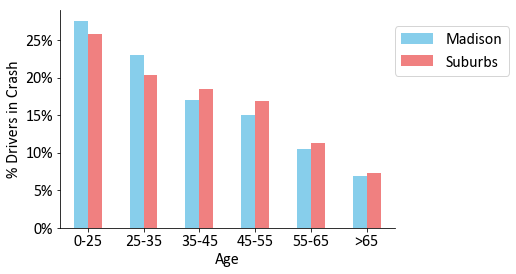

In [8]:
CONC= pd.concat([ageM,ageS], axis=1)
CONC.columns= ['Madison', 'Suburbs']
colors=["skyblue","lightcoral"]
ax=CONC.plot.bar(color=colors,rot=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel("Age")
ax.set_ylabel("% Drivers in Crash")
#ax.set_title("Age Distribution of Drivers in Crashes")

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(5, 21, 5)
ax.legend(loc=[1, 0.7])

fig = matplotlib.pyplot.gcf()
fig.savefig('Age.eps', dpi=100,bbox_inches="tight")

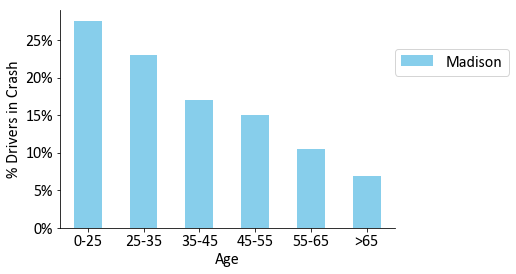

In [59]:
CONC= pd.concat([ageM], axis=1)
CONC.columns= ['Madison']
colors=["skyblue","lightcoral"]
ax=CONC.plot.bar(color=colors,rot=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel("Age")
ax.set_ylabel("% Drivers in Crash")
#ax.set_title("Age Distribution of Drivers in Crashes")

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(5, 21, 5)
ax.legend(loc=[1, 0.7])

fig = matplotlib.pyplot.gcf()
fig.savefig('AgeM.eps', dpi=100,bbox_inches="tight")

In [9]:
AMUnder21=qry("""
SELECT count(WEEK)
FROM df
WHERE ALCFLAG == "Y" and ((AGE1<21 and AGE1>0) or (AGE2<21 and AGE2>0))""",conn)

ASUnder21=qry("""
SELECT count(WEEK)
FROM df1
WHERE ALCFLAG == "Y" and ((AGE1<21 and AGE1>0) or (AGE2<21 and AGE2>0))""",conn1)

AM21and25=qry("""
SELECT count(WEEK)
FROM df
WHERE ALCFLAG == "Y" and (((AGE1>21 or AGE1=21) and AGE1<25) or ((AGE2>21 or AGE2=21) and AGE2<25))""",conn)

AS21and25=qry("""
SELECT count(WEEK)
FROM df1
WHERE ALCFLAG == "Y" and (((AGE1>21 or AGE1=21) and AGE1<25) or ((AGE2>21 or AGE2=21) and AGE2<25))""",conn1)

AM25and35=qry("""
SELECT count(WEEK)
FROM df
WHERE ALCFLAG == "Y" and (((AGE1>25 or AGE1=25) and AGE1<35) or ((AGE2>25 or AGE2=25) and AGE2<35))""",conn)

AS25and35=qry("""
SELECT count(WEEK)
FROM df1
WHERE ALCFLAG == "Y" and (((AGE1>25 or AGE1=25) and AGE1<35) or ((AGE2>25 or AGE2=25) and AGE2<35))""",conn1)

AM35and45=qry("""
SELECT count(WEEK)
FROM df
WHERE ALCFLAG == "Y" and (((AGE1>35 or AGE1=35) and AGE1<45) or ((AGE2>35 or AGE2=35) and AGE2<45))""",conn)

AS35and45=qry("""
SELECT count(WEEK)
FROM df1
WHERE ALCFLAG == "Y" and (((AGE1>35 or AGE1=35) and AGE1<45) or ((AGE2>35 or AGE2=35) and AGE2<45))""",conn1)

AM45and55=qry("""
SELECT count(WEEK)
FROM df
WHERE ALCFLAG == "Y" and (((AGE1>45 or AGE1=45) and AGE1<55) or ((AGE2>45 or AGE2=45) and AGE2<55))""",conn)

AS45and55=qry("""
SELECT count(WEEK)
FROM df1
WHERE ALCFLAG == "Y" and (((AGE1>45 or AGE1=45) and AGE1<55) or ((AGE2>45 or AGE2=45) and AGE2<55))""",conn1)

AM55and65=qry("""
SELECT count(WEEK)
FROM df
WHERE ALCFLAG == "Y" and (((AGE1>55 or AGE1=55) and AGE1<65) or ((AGE2>55 or AGE2=55) and AGE2<65))""",conn)

AS55and65=qry("""
SELECT count(WEEK)
FROM df1
WHERE ALCFLAG == "Y" and (((AGE1>55 or AGE1=55) and AGE1<65) or ((AGE2>55 or AGE2=55) and AGE2<65))""",conn1)

AM65=qry("""
SELECT count(WEEK)
FROM df
WHERE ALCFLAG == "Y" and ((AGE1>65) or (AGE2>65))""",conn)

AS65=qry("""
SELECT count(WEEK)
FROM df1
WHERE ALCFLAG == "Y" and ((AGE1>65) or (AGE2>65))""",conn1)

SumMA=AMUnder21["count(WEEK)"][0]+AM21and25["count(WEEK)"][0]+AM25and35["count(WEEK)"][0]+AM35and45["count(WEEK)"][0]+AM45and55["count(WEEK)"][0]+AM55and65["count(WEEK)"][0]+AM65["count(WEEK)"][0]
ageMA=Series({"0-21":(AMUnder21["count(WEEK)"][0]/SumMA)*100,"21-25":(AM21and25["count(WEEK)"][0]/SumMA)*100, "25-35":(AM25and35["count(WEEK)"][0]/SumMA)*100,"35-45":(AM35and45["count(WEEK)"][0]/SumMA)*100,"45-55":(AM45and55["count(WEEK)"][0]/SumMA)*100,"55-65":(AM55and65["count(WEEK)"][0]/SumMA)*100,">65":(AM65["count(WEEK)"][0]/SumMA)*100})

SumSA=ASUnder21["count(WEEK)"][0]+AS21and25["count(WEEK)"][0]+AS25and35["count(WEEK)"][0]+AS35and45["count(WEEK)"][0]+AS45and55["count(WEEK)"][0]+AS55and65["count(WEEK)"][0]+AS65["count(WEEK)"][0]
ageSA=Series({"0-21":(ASUnder21["count(WEEK)"][0]/SumMA)*100,"21-25":(AS21and25["count(WEEK)"][0]/SumSA)*100, "25-35":(AS25and35["count(WEEK)"][0]/SumSA)*100,"35-45":(AS35and45["count(WEEK)"][0]/SumSA)*100,"45-55":(AS45and55["count(WEEK)"][0]/SumSA)*100,"55-65":(AS55and65["count(WEEK)"][0]/SumSA)*100,">65":(AS65["count(WEEK)"][0]/SumSA)*100})

print(ASUnder21["count(WEEK)"][0])
print(SUnder21["count(WEEK)"][0])
print(AMUnder21["count(WEEK)"][0])
print(MUnder21["count(WEEK)"][0])

896
20271
873
20293


In [10]:
PageMA=Series({"0-21":(873/20293)*100,"21-25":(AM21and25["count(WEEK)"][0]/M21and25["count(WEEK)"][0])*100, "25-35":(AM25and35["count(WEEK)"][0]/M25and35["count(WEEK)"][0])*100,"35-45":(AM35and45["count(WEEK)"][0]/M35and45["count(WEEK)"][0])*100,"45-55":(AM45and55["count(WEEK)"][0]/M45and55["count(WEEK)"][0])*100,"55-65":(AM55and65["count(WEEK)"][0]/M55and65["count(WEEK)"][0])*100,">65":(AM65["count(WEEK)"][0]/M65["count(WEEK)"][0])*100})
PageSA=Series({"0-21":(896/20271)*100,"21-25":(AS21and25["count(WEEK)"][0]/S21and25["count(WEEK)"][0])*100, "25-35":(AS25and35["count(WEEK)"][0]/S25and35["count(WEEK)"][0])*100,"35-45":(AS35and45["count(WEEK)"][0]/S35and45["count(WEEK)"][0])*100,"45-55":(AS45and55["count(WEEK)"][0]/S45and55["count(WEEK)"][0])*100,"55-65":(AS55and65["count(WEEK)"][0]/S55and65["count(WEEK)"][0])*100,">65":(AS65["count(WEEK)"][0]/S65["count(WEEK)"][0])*100})

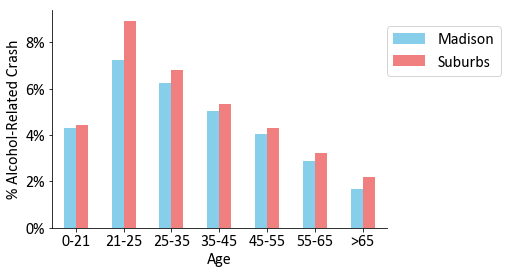

In [11]:
CONC= pd.concat([PageMA,PageSA], axis=1)
CONC.columns= ['Madison', 'Suburbs']
colors=["skyblue","lightcoral"]
ax=CONC.plot.bar(color=colors,rot=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Age")
ax.set_ylabel("% Alcohol-Related Crash")
#ax.set_title("Alcohol-Related Age distribution of Drivers in Crashes")

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.legend(loc=[1, 0.7])

fig = matplotlib.pyplot.gcf()
fig.savefig('AAge.eps', dpi=100,bbox_inches="tight")

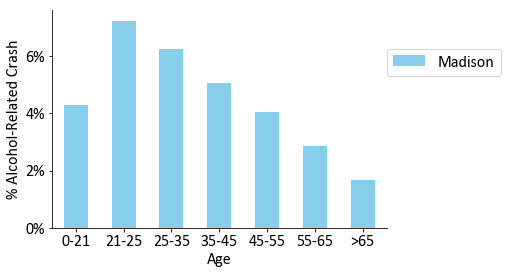

In [58]:
CONC= pd.concat([PageMA], axis=1)
CONC.columns= ['Madison']
colors=["skyblue","lightcoral"]
ax=CONC.plot.bar(color=colors,rot=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Age")
ax.set_ylabel("% Alcohol-Related Crash")
#ax.set_title("Alcohol-Related Age distribution of Drivers in Crashes")

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.legend(loc=[1, 0.7])

fig = matplotlib.pyplot.gcf()
fig.savefig('AAgeM.eps', dpi=100,bbox_inches="tight")

In [12]:
MF=qry("""
SELECT count(WEEK)
FROM df
WHERE (SEX1 ="F") or (SEX2="F")""",conn)

SF=qry("""
SELECT count(WEEK)
FROM df1
WHERE (SEX1 ="F") or (SEX2="F")""",conn1)

MM=qry("""
SELECT count(WEEK)
FROM df
WHERE (SEX1 ="M") or (SEX2="F")""",conn)

SM=qry("""
SELECT count(WEEK)
FROM df1
WHERE (SEX1 ="M") or (SEX2="M")""",conn1)

sumM=MM["count(WEEK)"][0]+MF["count(WEEK)"][0]
sumS=SM["count(WEEK)"][0]+SF["count(WEEK)"][0]
GM=Series({"Madison":round((MM["count(WEEK)"][0]/sumM)*100),"Suburb":round((SM["count(WEEK)"][0]/sumS)*100)})
GF=Series({"Madison":round((MF["count(WEEK)"][0]/sumM)*100),"Suburb":round((SF["count(WEEK)"][0]/sumS)*100)})

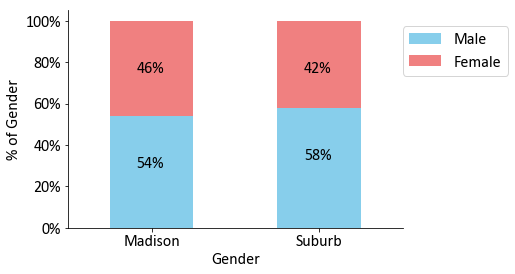

In [13]:
CONC= pd.concat([GM,GF], axis=1)
CONC.columns= ['Male', 'Female']
colors=["skyblue","lightcoral"]
ax=CONC.plot.bar(color=colors,rot=0,stacked=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Gender")
ax.set_ylabel("% of Gender")
#ax.set_title("Gender Distribution of Drivers in Crashes")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height/100), (x+0.16, y + height - 25))

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0, 101, 20)
plt.yticks(my_y_ticks)

ax.legend(loc=[1, 0.7])
fig = matplotlib.pyplot.gcf()
fig.savefig('GE.eps', dpi=100,bbox_inches="tight")

In [14]:
AMF=qry("""
SELECT count(WEEK)
FROM df
WHERE ALCFLAG == "Y" and ((SEX1 ="F") or (SEX2="F"))""",conn)

ASF=qry("""
SELECT count(WEEK)
FROM df1
WHERE ALCFLAG == "Y" and ((SEX1 ="F") or (SEX2="F"))""",conn1)

AMM=qry("""
SELECT count(WEEK)
FROM df
WHERE ALCFLAG == "Y" and ((SEX1 ="M") or (SEX2="F"))""",conn)

ASM=qry("""
SELECT count(WEEK)
FROM df1
WHERE ALCFLAG == "Y" and ((SEX1 ="M") or (SEX2="M"))""",conn1)

AsumM=AMM["count(WEEK)"][0]+AMF["count(WEEK)"][0]
AsumS=ASM["count(WEEK)"][0]+ASF["count(WEEK)"][0]
M=Series({"Madison":(AMM["count(WEEK)"][0]/AsumM)*100,"Suburb":(ASM["count(WEEK)"][0]/AsumS)*100})
F=Series({"Madison":(AMF["count(WEEK)"][0]/AsumM)*100,"Suburb":(ASF["count(WEEK)"][0]/AsumS)*100})

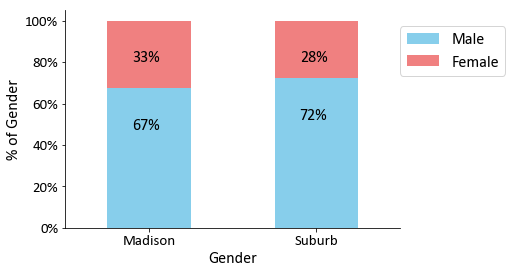

In [15]:
CONC= pd.concat([M,F], axis=1)
CONC.columns= ['Male', 'Female']
colors=["skyblue","lightcoral"]
ax=CONC.plot.bar(color=colors,rot=0,stacked=True,fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Gender")
ax.set_ylabel("% of Gender")
#ax.set_title("Gender Distribution of Drivers in Alcohol-Related Crashes")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height/100), (x+0.15, y + height - 20))

    
fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0, 101, 20)
plt.yticks(my_y_ticks)

ax.legend(loc=[1, 0.7])
fig = matplotlib.pyplot.gcf()
fig.savefig('Gender.eps', dpi=100,bbox_inches="tight")

In [48]:
YM=qry("""
SELECT count(YEAR)
FROM df
GROUP BY YEAR""",conn)

YMC=Series({"2000":YM["count(YEAR)"][0],"2001":YM["count(YEAR)"][1],"2002":YM["count(YEAR)"][2],"2003":YM["count(YEAR)"][3],"2004":YM["count(YEAR)"][4],"2005":YM["count(YEAR)"][5],"2006":YM["count(YEAR)"][6],"2007":YM["count(YEAR)"][7],"2008":YM["count(YEAR)"][8],"2009":YM["count(YEAR)"][9],"2010":YM["count(YEAR)"][10],"2011":YM["count(YEAR)"][11],"2012":YM["count(YEAR)"][12],"2013":YM["count(YEAR)"][13],"2014":YM["count(YEAR)"][14],"2015":YM["count(YEAR)"][15],"2016":YM["count(YEAR)"][16],"2017":YM["count(YEAR)"][17],"2018":YM["count(YEAR)"][18]})

YS=qry("""
SELECT count(YEAR)
FROM df1
GROUP BY YEAR""",conn1)

YSC=Series({"2000":YS["count(YEAR)"][0],"2001":YS["count(YEAR)"][1],"2002":YS["count(YEAR)"][2],"2003":YS["count(YEAR)"][3],"2004":YS["count(YEAR)"][4],"2005":YS["count(YEAR)"][5],"2006":YS["count(YEAR)"][6],"2007":YS["count(YEAR)"][7],"2008":YS["count(YEAR)"][8],"2009":YS["count(YEAR)"][9],"2010":YS["count(YEAR)"][10],"2011":YS["count(YEAR)"][11],"2012":YS["count(YEAR)"][12],"2013":YS["count(YEAR)"][13],"2014":YS["count(YEAR)"][14],"2015":YS["count(YEAR)"][15],"2016":YS["count(YEAR)"][16],"2017":YS["count(YEAR)"][17],"2018":YS["count(YEAR)"][18]})

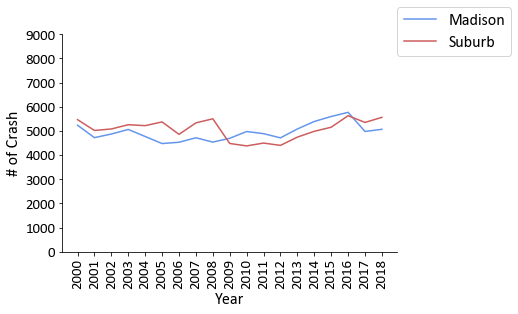

In [49]:
CONC= pd.concat([YMC,YSC], axis=1)
CONC.columns= ['Madison', 'Suburb']
colors=["cornflowerblue","Indianred"]
ax=CONC.plot(color=colors,stacked=False,fontsize=15,rot=90)

ax = plt.gca()
plt.xticks(np.arange(19), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'))
ax.set_xlabel("Year")
ax.set_ylabel("# of Crash")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_title("Crash Distribution by Year")

my_y_ticks = np.arange(0, 9001, 1000)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.9])

fig = matplotlib.pyplot.gcf()
fig.savefig('Yearcrash.eps', dpi=100,bbox_inches="tight")

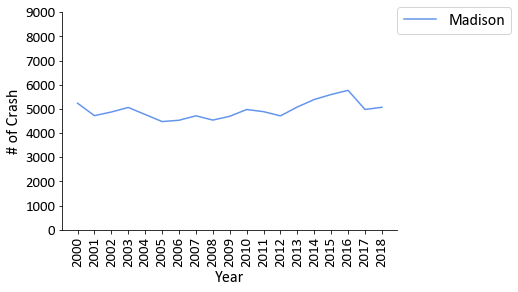

In [50]:
CONC= pd.concat([YMC], axis=1)
CONC.columns= ['Madison']
colors=["cornflowerblue","Indianred"]
ax=CONC.plot(color=colors,stacked=False,fontsize=15,rot=90)

ax = plt.gca()
plt.xticks(np.arange(19), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'))
ax.set_xlabel("Year")
ax.set_ylabel("# of Crash")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_title("Crash Distribution by Year")

my_y_ticks = np.arange(0, 9001, 1000)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.9])

fig = matplotlib.pyplot.gcf()
fig.savefig('YearcrashM.eps', dpi=100,bbox_inches="tight")

In [51]:
YMA=qry("""
SELECT count(YEAR)
FROM df
WHERE ALCFLAG == "Y"
GROUP BY YEAR
""",conn)

YSA=qry("""
SELECT count(YEAR)
FROM df1
WHERE ALCFLAG == "Y"
GROUP BY YEAR
""",conn1)

YSAA=Series({"2000":YSA["count(YEAR)"][0],"2001":YSA["count(YEAR)"][1],"2002":YSA["count(YEAR)"][2],"2003":YSA["count(YEAR)"][3],"2004":YSA["count(YEAR)"][4],"2005":YSA["count(YEAR)"][5],"2006":YSA["count(YEAR)"][6],"2007":YSA["count(YEAR)"][7],"2008":YSA["count(YEAR)"][8],"2009":YSA["count(YEAR)"][9],"2010":YSA["count(YEAR)"][10],"2011":YSA["count(YEAR)"][11],"2012":YSA["count(YEAR)"][12],"2013":YSA["count(YEAR)"][13],"2014":YSA["count(YEAR)"][14],"2015":YSA["count(YEAR)"][15],"2016":YSA["count(YEAR)"][16],"2017":YSA["count(YEAR)"][17],"2018":YSA["count(YEAR)"][18]})
YMAA=Series({"2000":YMA["count(YEAR)"][0],"2001":YMA["count(YEAR)"][1],"2002":YMA["count(YEAR)"][2],"2003":YMA["count(YEAR)"][3],"2004":YMA["count(YEAR)"][4],"2005":YMA["count(YEAR)"][5],"2006":YMA["count(YEAR)"][6],"2007":YMA["count(YEAR)"][7],"2008":YMA["count(YEAR)"][8],"2009":YMA["count(YEAR)"][9],"2010":YMA["count(YEAR)"][10],"2011":YMA["count(YEAR)"][11],"2012":YMA["count(YEAR)"][12],"2013":YMA["count(YEAR)"][13],"2014":YMA["count(YEAR)"][14],"2015":YMA["count(YEAR)"][15],"2016":YMA["count(YEAR)"][16],"2017":YMA["count(YEAR)"][17],"2018":YMA["count(YEAR)"][18]})

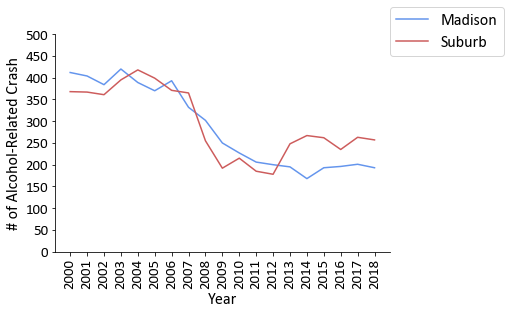

In [52]:
CONC= pd.concat([YMAA,YSAA], axis=1)
CONC.columns= ['Madison', 'Suburb']
colors=["cornflowerblue","Indianred"]
ax=CONC.plot(color=colors,stacked=False,fontsize=15,rot=90)

ax = plt.gca()
plt.xticks(np.arange(19), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'))
ax.set_xlabel("Year")
ax.set_ylabel("# of Alcohol-Related Crash")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_title("Crash Distribution by Year")

my_y_ticks = np.arange(0, 501, 50)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.9])

fig = matplotlib.pyplot.gcf()
fig.savefig('AYearcrash.eps', dpi=100,bbox_inches="tight")

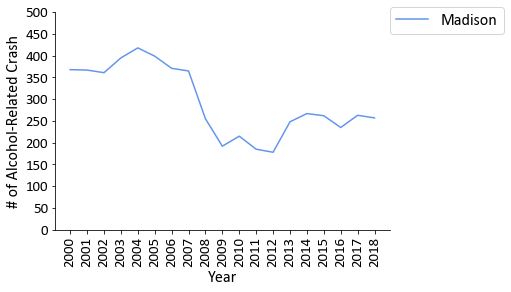

In [53]:
CONC= pd.concat([YMSA], axis=1)
CONC.columns= ['Madison']
colors=["cornflowerblue","Indianred"]
ax=CONC.plot(color=colors,stacked=False,fontsize=15,rot=90)

ax = plt.gca()
plt.xticks(np.arange(19), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'))
ax.set_xlabel("Year")
ax.set_ylabel("# of Alcohol-Related Crash")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_title("Crash Distribution by Year")

my_y_ticks = np.arange(0, 501, 50)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.9])

fig = matplotlib.pyplot.gcf()
fig.savefig('AYearcrashM.eps', dpi=100,bbox_inches="tight")

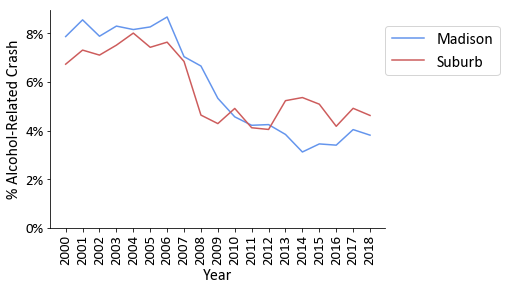

In [54]:
CONC= pd.concat([(YMAA/YMC)*100,(YSAA/YSC)*100], axis=1)
CONC.columns= ['Madison', 'Suburb']
colors=["cornflowerblue","Indianred"]
ax=CONC.plot.line(color=colors,stacked=False,fontsize=15,rot=90)

ax = plt.gca()
plt.xticks(np.arange(19), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'))
ax.set_xlabel("Year")
ax.set_ylabel("% Alcohol-Related Crash")
#ax.set_title(" Alcohol-Related Crash Distribution by Year")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0, 9, 2)
plt.yticks(my_y_ticks)

ax.legend(loc=[1,0.7])
ax.get_figure().savefig("YearcrashA.eps", bbox_inches="tight")

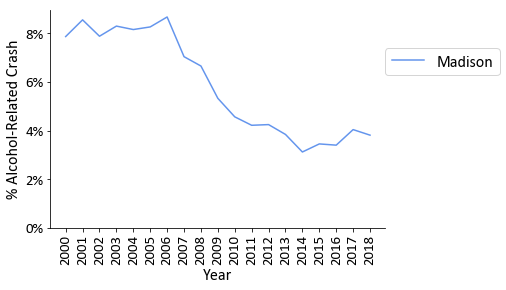

In [55]:
CONC= pd.concat([(YMAA/YMC)*100], axis=1)
CONC.columns= ['Madison']
colors=["cornflowerblue","Indianred"]
ax=CONC.plot.line(color=colors,stacked=False,fontsize=15,rot=90)

ax = plt.gca()
plt.xticks(np.arange(19), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'))
ax.set_xlabel("Year")
ax.set_ylabel("% Alcohol-Related Crash")
#ax.set_title(" Alcohol-Related Crash Distribution by Year")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0, 9, 2)
plt.yticks(my_y_ticks)

ax.legend(loc=[1,0.7])
ax.get_figure().savefig("YearcrashAM.eps", bbox_inches="tight")

In [56]:
INJ_FAT_ACCDTYPE = qry ("""
SELECT ACCDTYPE, count(Month) as "Sum", sum(TOTFATL) as "Fatality",0 as "ratio"
FROM df1 
GROUP BY ACCDTYPE
ORDER BY Fatality DESC
""",conn1)

for i in range(len(INJ_FAT_ACCDTYPE)):
    INJ_FAT_ACCDTYPE["ratio"][i]=(INJ_FAT_ACCDTYPE["Fatality"][i]/INJ_FAT_ACCDTYPE["Sum"][i])*10000

TYPE=Series({"Pedestrian":5.8,"Bridge parapet":2.8,"Culvert":2.2,"Embankment":1.9,"Overturned vehicle":1.6,"Other object fixed":1.5,"Tree":1.3,"Ditch":1.1,"Bike":0.9," Guardrail end":0.9})

d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


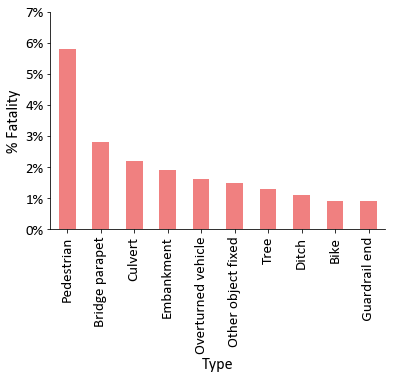

In [57]:
colors=["lightcoral"]
ax=TYPE.plot.bar(color=colors,fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Type")
ax.set_ylabel("% Fatality")
#ax.set_title("% Fatality Distributed by Type in Suburbs")

fmt='%.00f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0,8,1)
plt.yticks(my_y_ticks)

fig = matplotlib.pyplot.gcf()
fig.savefig('TYPEFS.eps', dpi=100,bbox_inches="tight")